In [63]:
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy
import sys
import sklearn
from scipy import stats
%matplotlib inline

In [10]:
libraries = [['Numpy', np],['Pandas', pd],['Matplotlib', matplotlib],['sklearn', sklearn]]
for i in libraries:
    print('{0} Version: {1}'.format(i[0], i[1].__version__))
print("Python:", sys.version)

Numpy Version: 1.14.2
Pandas Version: 0.20.3
Matplotlib Version: 2.1.0
sklearn Version: 0.19.1
Python: 3.6.3 |Anaconda custom (64-bit)| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]


In [95]:
class knn:
    
    def __init__(self, n_neighbors = 5, knn_type = 'regression'):
        
        # knn_type can be regression or 'classification'
        
        if n_neighbors > 0:
            self.K = int(n_neighbors)
        else:
            raise ValueError('n_neighbors must be positive')
        
        self.X = None
        self.Y = None
        self.knn_type = str(knn_type)
        
    def pandas_to_numpy(self, X):
        if type(X) == type(pd.DataFrame()) or type(X) == type(pd.Series([1,2])):
            return X.as_matrix()
        if type(X) == type(np.array([1])):
            return X
        else:
            return np.array(X)
        
        
    def handle_1d_data(self, X):
        if X.ndim == 1:
            return X.reshape(-1,1)
        
    def convert_to_array(self, X):
        x = self.pandas_to_numpy(X)
        x = self.handle_1d_data(X)
        return x
    
    def fit(self, X, Y):
        self.X = self.convert_to_array(X)
        self.Y = self.convert_to_array(Y)
        
        
    def distance_btw_points(self, a, b):
        
        #assert np.array(a).shape == np.array(b).shape
        return np.sqrt(np.sum((b-a)**2))
    
    def prediction(self, distance, knn_type):
        self.knn_type = knn_type
        if self.knn_type == 'regression':
            distance = sorted(distance, key = lambda i : i[0])
            dis, votes = zip(*distance)
            return np.mean(votes[:self.K])
        elif self.knn_type == 'classification':
            distance = sorted(distance, key = lambda i : i[0])
            dis, votes = zip(*distance)
            return int(stats.mode(votes[:self.K])[0])
            
    
    def predict(self, X, knn_type):
        result = []
        self.knn_type = knn_type
        for a in X:
            distance = []
            for b,c in zip(self.X, self.Y):
                distance.append([self.distance_btw_points(a, b), c])
                
            result.append(self.prediction(distance, self.knn_type))
        return np.array(result).reshape(-1,1)
    
    def score(self, X, Y, knn_type):
        self.knn_type = knn_type
        pred = self.predict(X, self.knn_type)
        return -1.*  np.mean((np.array(pred)-np.array(y))**2)
        
    
    
                
        
        
         
        
    
    
            
        
        
    

In [61]:
def get_data():
    x = np.linspace(-10,10,300)
    y = np.cos(x)
    return x, y

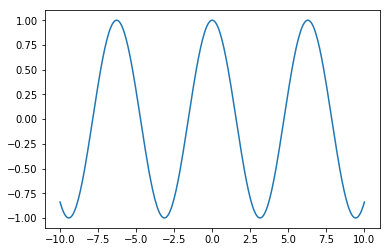

In [64]:
X,y = get_data()
plt.plot(X,y);

In [65]:
def shuffle_data(X, y):
    assert len(X) == len(y)
    permute = np.random.permutation(len(y))
    return X[permute], y[permute]

def train_test_split_manual(X, y, test_size=0.3):
    nX, ny = shuffle_data(X,y)
    split_index = int(len(X)*test_size)
    testX = nX[:split_index]
    trainX = nX[split_index:]
    testy = ny[:split_index]
    trainy = ny[split_index:]
    return trainX, testX, trainy, testy

In [66]:
x_train, x_test, y_train, y_test = train_test_split_manual(X,y,test_size=0.3)

In [99]:
knn1 = knn(n_neighbors=5)
knn1.fit(x_train,y_train)
knn1.score(x_test,y_test, 'regression')

-1.0055220518408778

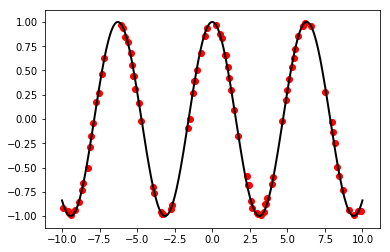

In [104]:
preds = knn1.predict(x_test,'regression')
plt.plot(X,y,'k',lw=2,label='Truth')
plt.scatter(x_test, preds,c='r', label="Prediction")